##Set up an environment

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##Import the data


In [2]:
# Import Netflix data
from google.colab import files
uploaded = files.upload()

# Print head of DataFrame
data = pd.read_csv("Netflix TV Shows and Movies.csv")

Saving Netflix TV Shows and Movies.csv to Netflix TV Shows and Movies.csv


## Understanding the data

In [10]:
data.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [4]:
# DataFrame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


##Cleaning the data

In [6]:
# Drop unusable columns
data = data.drop(columns=['index', 'id', 'imdb_id'])

data.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


##Data visualization

In [22]:
# Pie chart for distribution of types
type_counts = data['type'].value_counts()

fig = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='Distribution of Types'
)
fig.show()

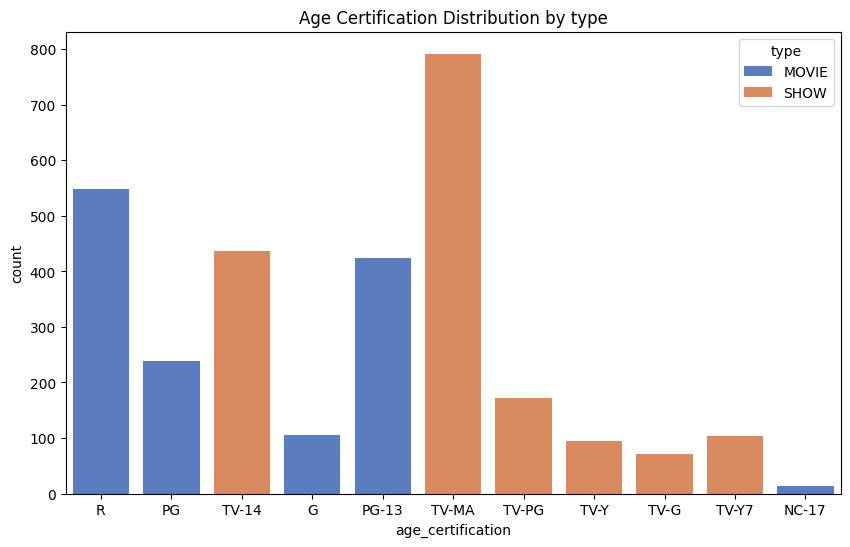

In [23]:
#  Age Certification Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue='type', data=data, palette='muted')
plt.title('Age Certification Distribution by type')
plt.show()

<ipython-input-24-e7d61f169b16>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




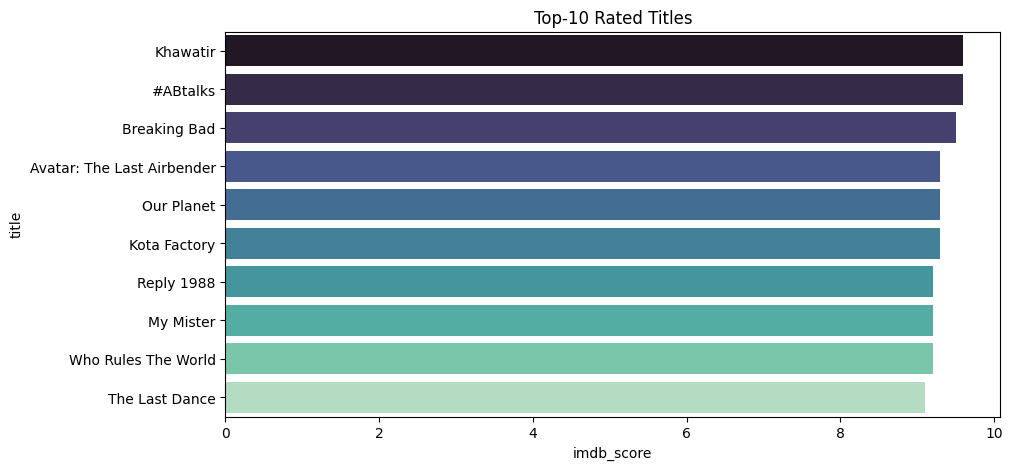

In [24]:
top_rated = data.nlargest(10,'imdb_score')
plt.figure(figsize=(10, 5))
sns.barplot(x='imdb_score', y='title', data=top_rated, palette='mako')
plt.title('Top-10 Rated Titles')
plt.show()

In [25]:
# DataFrame describe
data.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


##Outlier

In [26]:
# to check outlier[Lower Fence- Higher fence]
def custom_check(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    higher_fence = q3 + 1.5 * IQR
    return {
        'Lower Fence': lower_fence,
        'Higher fence': higher_fence
    }
subset1 = custom_check(data['imdb_score'])
subset2 = custom_check(data['imdb_votes'])
subset3 = custom_check(data['runtime'])
subset4 = custom_check(data['release_year'])
subsets_dict = {
    "imdb_score": subset1,
    "imdb_votes": subset2,
    "runtime": subset3,
    "release_year": subset4
}
table = pd.DataFrame(subsets_dict)
print(table)


              imdb_score  imdb_votes  runtime  release_year
Lower Fence          3.4    -13913.5    -46.5        2007.5
Higher fence         9.8     24578.5    197.5        2027.5


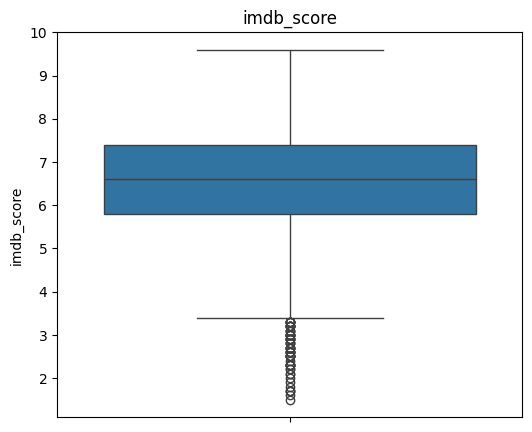

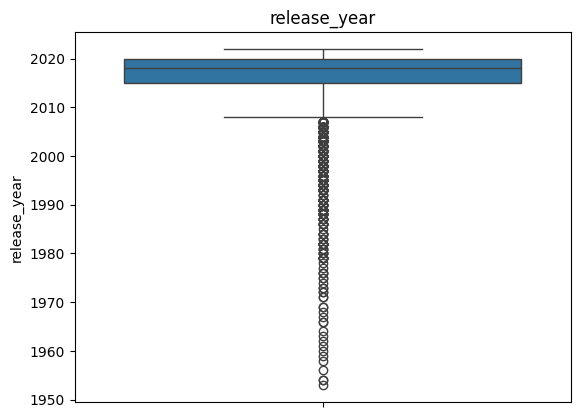

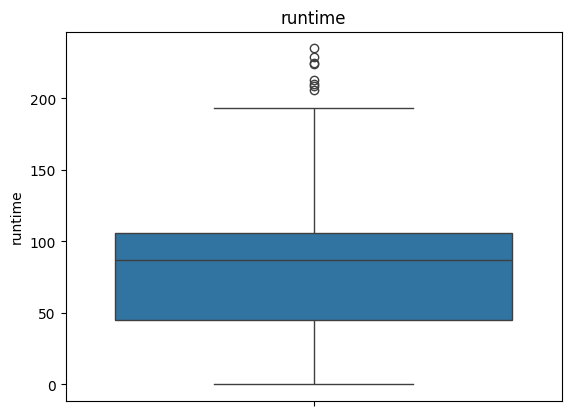

In [27]:
plt.figure(figsize=(6,5))
for i in ["imdb_score","release_year","runtime"]:
        sns.boxplot(data[i])
        plt.title(i)
        plt.show()

<Axes: xlabel='type', ylabel='runtime'>

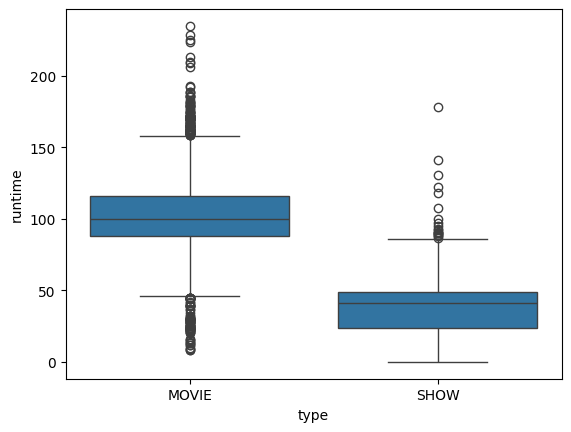

In [28]:
# @title Runtime Comparison: Movies vs. Shows

sns.boxplot(data=data, x='type', y='runtime')

## Histograms

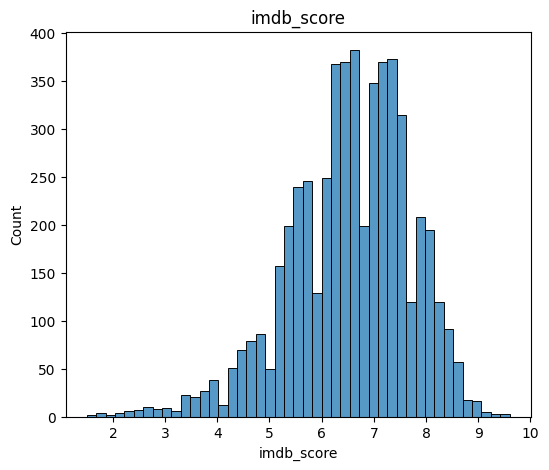

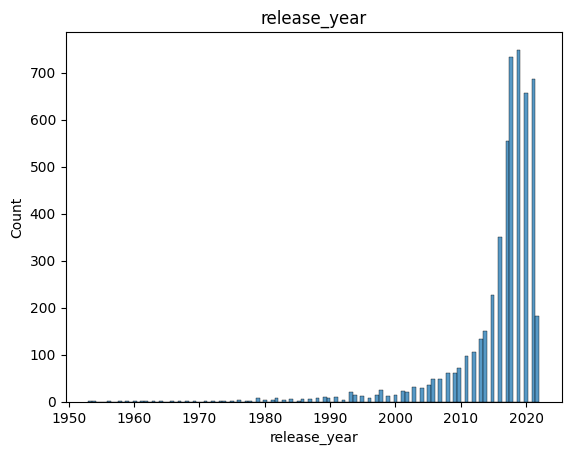

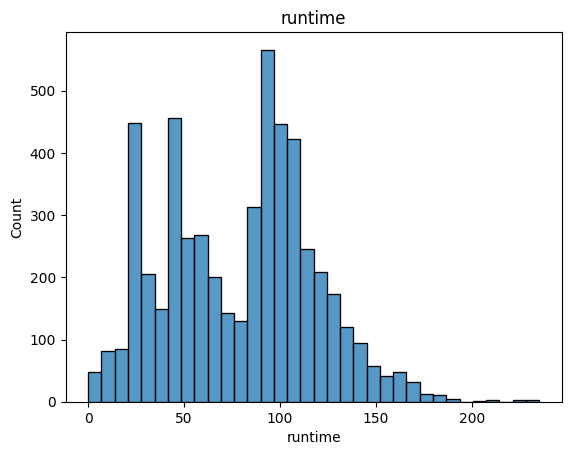

In [29]:
plt.figure(figsize=(6,5))
for i in ["imdb_score","release_year","runtime"]:
        sns.histplot(data[i],)
        plt.title(i)
        plt.show()


##Pair Plot of Numeric Columns and Correlation

<Figure size 1200x800 with 0 Axes>

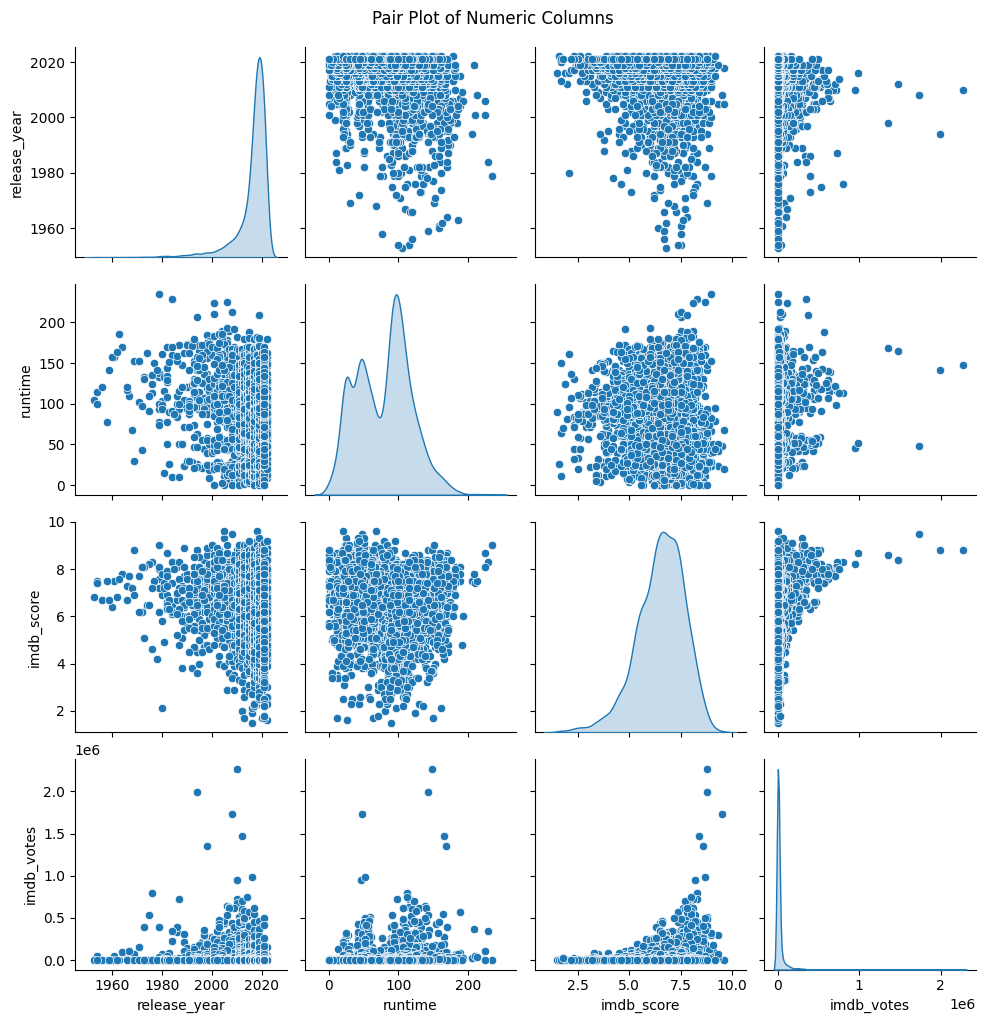

In [30]:
plt.figure(figsize=(12, 8))
sns.pairplot(data[['release_year', 'runtime', 'imdb_score', 'imdb_votes']], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

In [31]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,release_year,runtime,imdb_score,imdb_votes
release_year,1.000000,-0.201491,-0.102849,-0.196988
runtime,-0.201491,1.000000,-0.159297,0.138610
imdb_score,-0.102849,-0.159297,1.000000,0.189954
imdb_votes,-0.196988,0.138610,0.189954,1.000000
